# Predicting Fuel Economy Using Simple Linear Regression

## Goals
To understand the relationship between vehicle horsepower and fuel economy.
To provide insights that can guide automotive manufacturers in optimizing vehicle design for better fuel efficiency
To develop a reliable predictive model that can be used for future analysis and decision-making.

### The Questions
1) How does horsepower affect fuel economy?
2) Can we create a reliable predictive model for Mileage Per Gallon (MPG) based Vehicle Horse Power (HP)?

### Dataset
The dataset used for this analysis is the **FuelEconomy.csv**, which includes the following variables:
+ Independent Variable (X): Vehicle Horse Power (HP)
+ Dependent Variable (Y): Mileage Per Gallon (MPG)



### 1) Exploratory Data Analysis
a) Data Loading
Import the "FuelEconomy.csv" dataset into the analysis environment.

In [2]:
#!pip install --upgrade seaborn
#!pip install --upgrade pandas

#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load dataset 
df = pd.read_csv('FuelEconomy.csv')

df.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739



b) Conduct data visualization and preliminary analysis to identify trends, patterns, and anomalies within the dataset.

In [10]:
df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


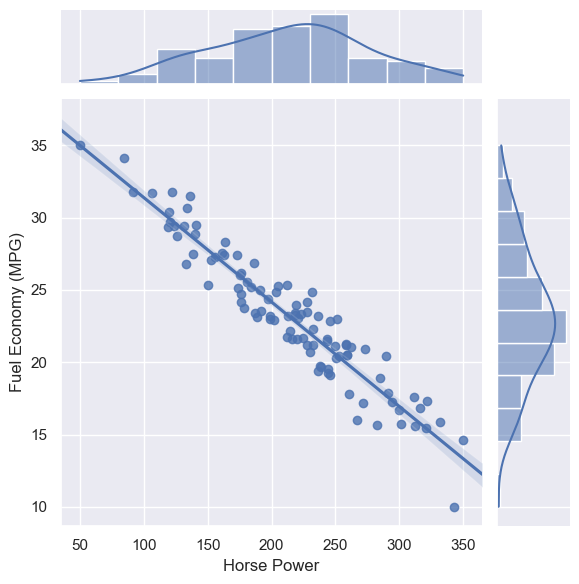

In [12]:
# Visualize data 
sns.set_theme(style='darkgrid')
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data=df, kind='reg', truncate=False)

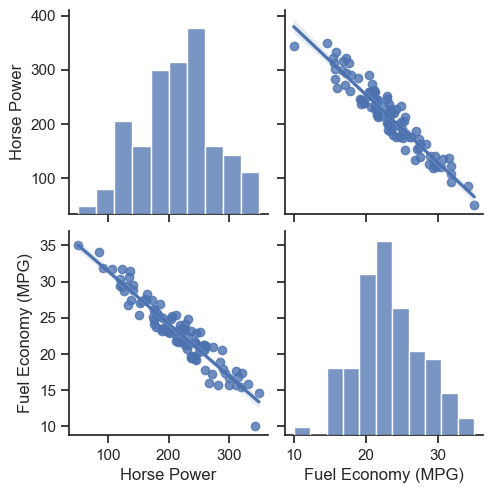

In [13]:
sns.set_theme(style="ticks")
sns.pairplot(df, kind='reg')
plt.show()

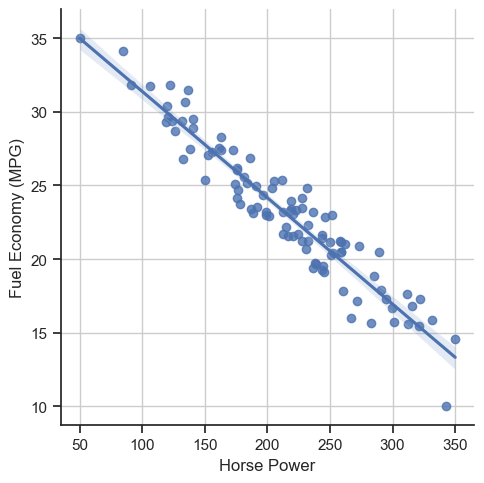

In [15]:
sns.set_theme(style="ticks")
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=df)
plt.grid()
plt.show()

### 2) Create Testing and Training Dataset
Split the dataset into training (80%) and testing (20%) subsets to facilitate model training and evaluation.

In [16]:
X = df['Horse Power']  # Input to the Model
y = df['Fuel Economy (MPG)']  # Output to the Model


In [17]:
# Convert X and y into arrays
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

### 3) Model Development
Utilize Scikit-Learn to implement a simple linear regression model that predicts fuel economy based on horsepower.


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# Training model 
SimpleLinearRegression = LinearRegression(fit_intercept=True)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression()

In [20]:
print('Linear Model Coefficient (m):', SimpleLinearRegression.coef_)
print('Linear Model Coefficient (b):', SimpleLinearRegression.intercept_)

Linear Model Coefficient (m): [[-0.07168404]]
Linear Model Coefficient (b): [38.61508242]



### 4) Test Model
Assess the performance of the trained model using relevant metrics to ensure its accuracy and reliability.

In [21]:
y_predict = SimpleLinearRegression.predict(X_test)
y_predict

array([[28.51051438],
       [15.97600843],
       [17.76311294],
       [29.56776754],
       [24.91633682],
       [15.54423727],
       [21.66435554],
       [24.35294674],
       [27.69417263],
       [24.87219018],
       [32.55262039],
       [30.99811148],
       [26.94416514],
       [26.04536403],
       [25.97528181],
       [19.84446546],
       [27.04448483],
       [20.03578431],
       [21.49431809],
       [29.10479177],
       [24.33937528],
       [22.09458677],
       [26.14640961],
       [24.16168332],
       [14.03417807]])

In [22]:
y_test

array([[29.51559288],
       [16.8311881 ],
       [17.87326587],
       [28.71821022],
       [24.98962965],
       [17.30062804],
       [19.36733689],
       [23.17222305],
       [27.09441098],
       [23.55672887],
       [34.11402465],
       [31.72256556],
       [27.41866055],
       [26.05708471],
       [24.6959341 ],
       [21.05039889],
       [27.54462659],
       [20.46737357],
       [19.67409397],
       [26.77814827],
       [23.01119391],
       [20.71572205],
       [25.12965002],
       [22.93765296],
       [10.        ]])

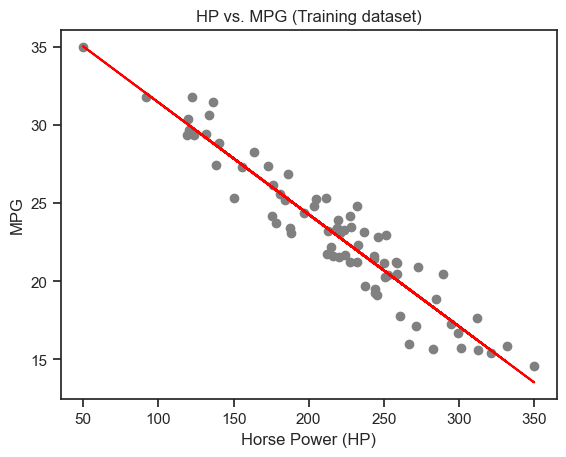

In [23]:
# Visualize Train Set Results
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color='red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Training dataset)')
plt.show()

In [24]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
print('Model Accuracy:', accuracy_LinearRegression)
#The model achieved an accuracy of approximately 92%, suggesting it is effective in predicting fuel economy based on horsepower.


Model Accuracy: 0.9213080383116085


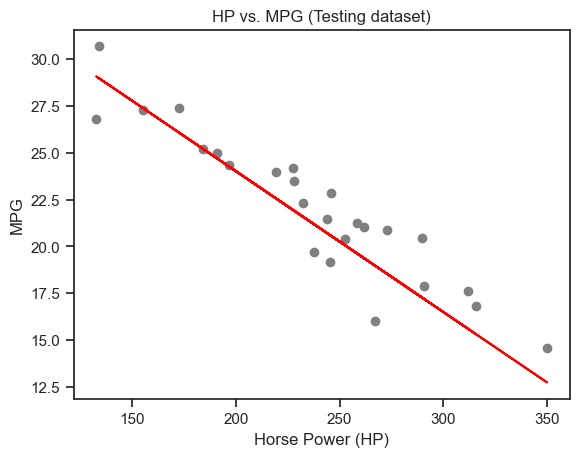

In [18]:

# Visualize Test Set Results
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, SimpleLinearRegression.predict(X_test), color='red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Testing dataset)')
plt.show()

In [25]:
# Use the trained Model to generate the predictions
HP = np.array([240]).reshape(-1, 1)
MPG = SimpleLinearRegression.predict(HP)
print('Predicted MPG for 240 HP:', MPG)

# The prediction for a vehicle with 240 HP is approximately 21.4 MPG, demonstrating the practical application of the model.

Predicted MPG for 240 HP: [[21.41091296]]
